Text(0.5, 1.0, '160')

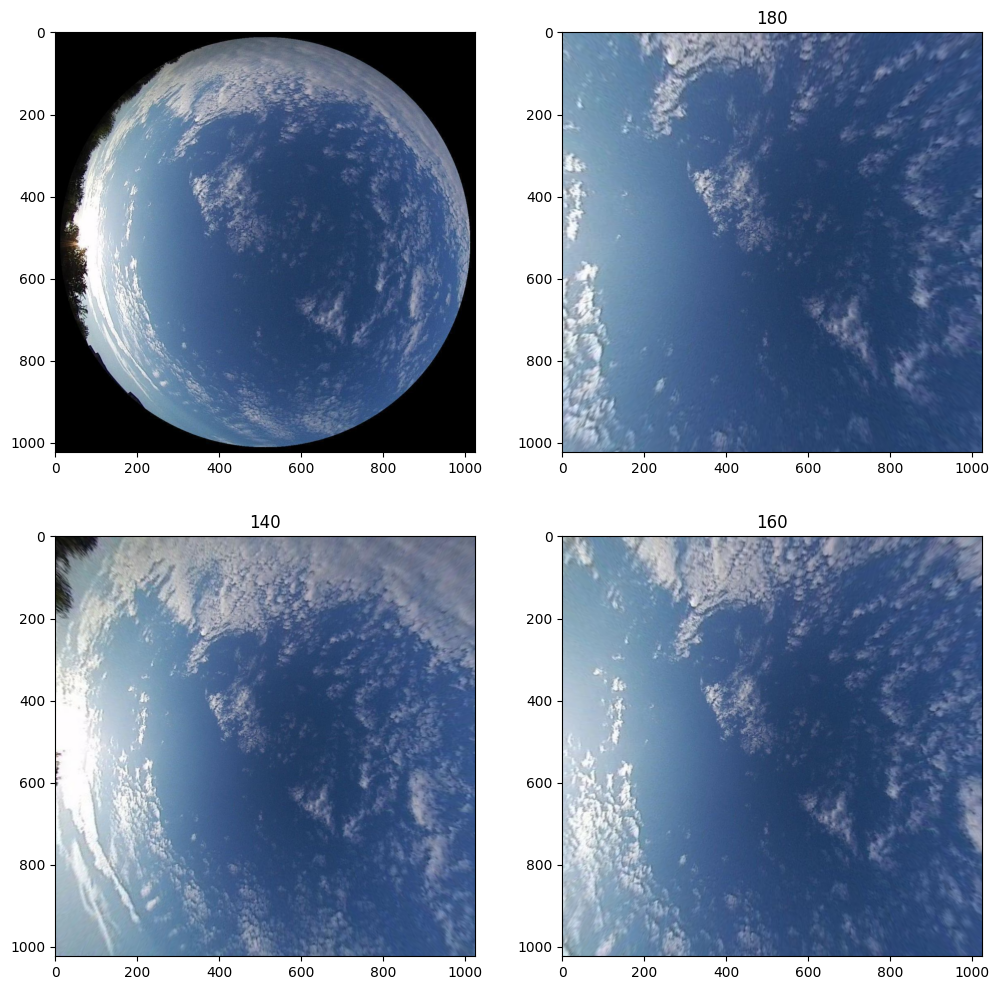

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from defisheye import Defisheye
import cv2  


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


img= "./TJNU-GRSCD/train/2_altocumulus/2_altocumulus_000053.jpg"

dtype = 'linear'
format = 'circular'
fov = 180
fov2=140
fov3=160
pfov = 120

image = cv2.imread(img)  
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
obj2 = Defisheye(img, dtype=dtype, format=format, fov=fov2, pfov=pfov)
obj3 = Defisheye(img, dtype=dtype, format=format, fov=fov3, pfov=pfov)

new_image = obj.convert()
new_image= cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

new_image2 = obj2.convert()
new_image2= cv2.cvtColor(new_image2, cv2.COLOR_BGR2RGB)

new_image3 = obj3.convert()
new_image3= cv2.cvtColor(new_image3, cv2.COLOR_BGR2RGB)



fig, axes= plt.subplots(2,2,figsize=(12,12)) 
axes=axes.flat

axes[1].imshow(new_image)
axes[1].set_title(f'{fov}')
axes[0].imshow(image)
axes[2].imshow(new_image2)
axes[2].set_title(f'{fov2}')
axes[3].imshow(new_image3)
axes[3].set_title(f'{fov3}')